In [1]:
import sys
sys.path.append("../src")

import generate_general_networks as generate
import torch
import matplotlib.pyplot as plt
import json
import numpy as np
import tikzplotlib

In [26]:
# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex.json")
results = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_1.json")
results_1 = json.load(f)
f.close()

# Load results from optimization
f = open("../optimization_results/general_optimization/medium_complex_3.json")
results_2 = json.load(f)
f.close()

In [3]:
# Collecting network configuration
network_file = results['network_file']
f = open("../"+network_file)
network_config = json.load(f)
f.close()

T = network_config['T']
N = network_config['N']
controls = network_config['control_points']

In [27]:
# Collecting the start and final parameters
start = results['parameters'][0]
opt = results['parameters'][-1]
objective_vals = results['objectives']
parameters = results['parameters']

objective_vals_1 = results_1['objectives']
objective_vals_2 = results_2['objectives']

In [9]:
# Create the networks
start_speeds = [[torch.tensor(start[i])] for i in range(8)]
opt_speeds = [[torch.tensor(opt[i])] for i in range(8)]

start_cycle = [torch.tensor(start[8]), torch.tensor(start[9])]
opt_cycle = [torch.tensor(opt[8]), torch.tensor(opt[9])]

start_network = generate.medium_complex_network(T, N, start_speeds, controls, [start_cycle], track_grad=False)
opt_network = generate.medium_complex_network(T, N, opt_speeds, controls, [opt_cycle], track_grad=False)


In [10]:
# Do the simulations
densities, _, lengths, delays, n_stops = start_network.solve_cons_law_counting()
opt_densities, _, opt_lengths, opt_delays, opt_n_stops = opt_network.solve_cons_law_counting()

Bus bus_3 reached bus stop 0 at time 21.571428298950195, should wait for 29.992795944213867 seconds
Bus bus_2 reached bus stop 0 at time 98.28585815429688, should wait for 29.62087059020996 seconds
Bus bus_1 reached bus stop 0 at time 107.92876434326172, should wait for 29.526948928833008 seconds
Bus bus_3 reached bus stop 0 at time 17.714290618896484, should wait for 29.506494522094727 seconds
Bus bus_2 reached bus stop 0 at time 44.97145080566406, should wait for 29.841304779052734 seconds
Bus bus_1 reached bus stop 0 at time 52.17145538330078, should wait for 29.57672691345215 seconds


In [11]:
# Converting from dict to lists
times = list(lengths[0].keys())
distance = list(lengths[0].values())
distance2 = list(lengths[1].values())
distance3 = list(lengths[2].values())


opt_times = list(opt_lengths[0].keys())
opt_distance = list(opt_lengths[0].values())
opt_distance2 = list(opt_lengths[1].values())
opt_distance3 = list(opt_lengths[2].values())

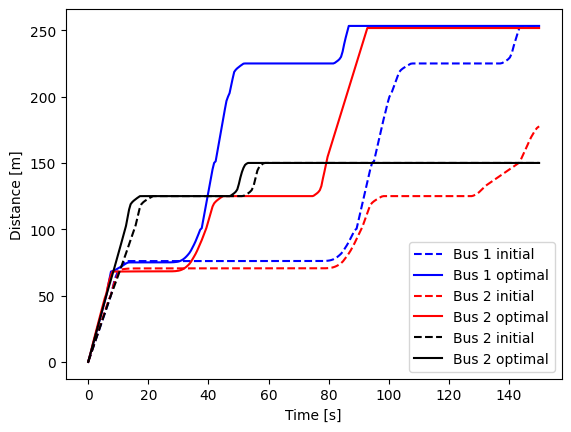

In [15]:
# Plotting distances

plt.plot(times, distance, '--b', label = "Bus 1 initial")
plt.plot(opt_times, opt_distance, 'b', label = "Bus 1 optimal")
plt.plot(times, distance2, '--r', label = "Bus 2 initial")
plt.plot(opt_times, opt_distance2, 'r', label = "Bus 2 optimal")
plt.plot(times, distance3, '--k', label = "Bus 3 initial")
plt.plot(opt_times, opt_distance3, 'k', label = "Bus 3 optimal")

plt.ylabel("Distance [m]")
plt.xlabel("Time [s]")
plt.legend()

tikzplotlib.save("../figurer/medium_complex_dist.tex")

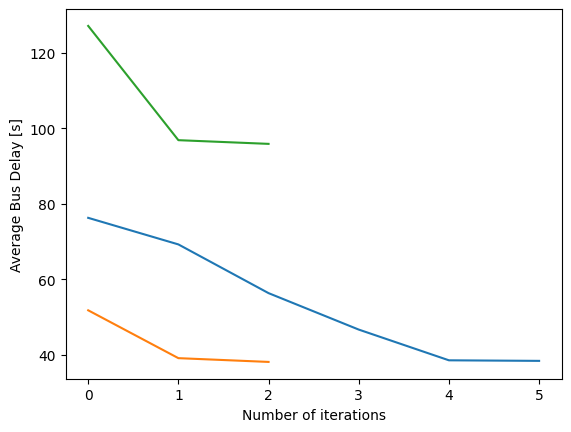

In [28]:
plt.plot([i for i in range(len(objective_vals)-1)], objective_vals[:-1])
plt.plot([i for i in range(len(objective_vals_1)-1)], objective_vals_1[:-1])
plt.plot([i for i in range(len(objective_vals_2)-1)], objective_vals_2[:-1])


plt.xlabel("Number of iterations")
plt.ylabel("Average Bus Delay [s]")
tikzplotlib.save("../figurer/medium_conv.tex")